In [59]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import math as m
import glob
import os

In [60]:
#Merge two csv output files.

# setting the path for joining multiple files
files = os.path.join("Output*.csv")

# list of merged files returned
files = glob.glob(files)

print("Resultant CSV after joining all CSV files at a particular location...");

# joining files with concat and read_csv
data = pd.concat(map(pd.read_csv, files), ignore_index=True)
print(data)

Resultant CSV after joining all CSV files at a particular location...
                     Name  N2 Henrys  N2 Henrys err  methane Henrys  \
0               fandeg_P1   0.000002   1.225280e-08        0.000010   
1     fabfof_P1_charged_H   0.000004   3.160510e-08        0.000024   
2               ewobav_P1   0.000003   3.164240e-08        0.000022   
3               eyopue_P1   0.000013   1.517360e-07        0.000153   
4               eyoqal_P1   0.000020   1.642480e-07        0.000263   
...                   ...        ...            ...             ...   
2551          sahyoq04_P1   0.000002   2.662730e-09        0.000005   
2552          somfac_P1_H   0.000009   2.200320e-08        0.000054   
2553            sepzul_P1   0.000002   2.573650e-08        0.000010   
2554            soqsey_P1   0.000004   1.614610e-08        0.000015   
2555            sarfea_P1   0.000009   5.655930e-08        0.000063   

      methane Henrys err  helium Henrys  helium Henrys err  N2 adsorb  \
0   

In [61]:
#Save the resulting dataframe.
data.to_csv("Final_results.csv")

In [62]:
#Add three new columns: selectivity for the mixture of equal molarity of methane, N2 and helium.
data["Selectivity N2/He (1:1:1)"] = data["N2 Henrys"]/data["helium Henrys"]
data["Selectivity methane/He (1:1:1)"] = data["methane Henrys"]/data["helium Henrys"]
data["Selectivity methane/N2 (1:1:1)"] = data["methane Henrys"]/data["N2 Henrys"]
#And the errors.
#When two quantities are divided or multiplied, the relative error in the final answer is given as sum of relative error of each quantity.
data["Selectivity N2/He (1:1:1) err"] = data["N2 Henrys err"]+data["helium Henrys err"]
data["Selectivity methane/He (1:1:1) err"] = data["methane Henrys err"]+data["helium Henrys err"]
data["Selectivity methane/N2 (1:1:1) err"] = data["methane Henrys err"]+data["N2 Henrys err"]

In [63]:
data.head()

,Name,N2 Henrys,N2 Henrys err,methane Henrys,methane Henrys err,helium Henrys,helium Henrys err,N2 adsorb,N2 adsorb err,methane adsorb,methane adsorb err,helium adsorb,helium adsorb err,Selectivity N2/He (1:1:1),Selectivity methane/He (1:1:1),Selectivity methane/N2 (1:1:1),Selectivity N2/He (1:1:1) err,Selectivity methane/He (1:1:1) err,Selectivity methane/N2 (1:1:1) err
0,fandeg_P1,0.000002,1.225280e-08,0.000010,9.744330e-08,9.898290e-08,5.291880e-10,-11.749556,NaN,-15.954590,0.019017,-1.942116,0.007266,20.268248,98.008646,4.835576,1.278199e-08,9.797249e-08,1.096961e-07
1,fabfof_P1_charged_H,0.000004,3.160510e-08,0.000024,2.090760e-07,1.349280e-07,6.150180e-10,-14.266595,NaN,-19.358686,0.015610,-2.240203,0.005769,26.927991,176.078353,6.538860,3.222012e-08,2.096910e-07,2.406811e-07
2,ewobav_P1,0.000003,3.164240e-08,0.000022,6.906710e-07,5.907370e-08,4.271350e-10,-17.225907,NaN,-23.042329,0.083945,-2.723487,0.011010,47.527072,370.367863,7.792777,3.206954e-08,6.910981e-07,7.223134e-07
3,eyopue_P1,0.000013,1.517360e-07,0.000153,2.779460e-06,1.425980e-07,5.169810e-10,-17.851637,NaN,-25.119245,0.049920,-2.530370,0.009523,91.278279,1072.827108,11.753367,1.522530e-07,2.779977e-06,2.931196e-06
4,eyoqal_P1,0.000020,1.642480e-07,0.000263,6.324280e-06,1.529990e-07,5.506950e-10,-18.738140,NaN,-26.255156,0.057045,-2.745072,0.010078,130.434186,1718.717116,13.176892,1.647987e-07,6.324831e-06,6.488528e-06


In [64]:
#Add three new columns: selectivity for the mixture of 0.95:0.05:0.045 molar fraction of methane, N2 and helium (hypothetical natural gas)
data["Selectivity N2/He (0.95:0.05:0.045)"] = (0.05*data["N2 Henrys"])/(0.045*data["helium Henrys"])
data["Selectivity methane/He (0.95:0.05:0.045)"] = (0.95*data["methane Henrys"])/(0.045*data["helium Henrys"])
data["Selectivity methane/N2 (0.95:0.05:0.045)"] = (0.95*data["methane Henrys"])/(0.05*data["N2 Henrys"])
#And errors. When multiplying by a constant, multiply the error by the same constant.
data["Selectivity N2/He (0.95:0.05:0.045) err"] = (0.05*data["N2 Henrys err"])+(0.045*data["helium Henrys err"])
data["Selectivity methane/He (0.95:0.05:0.045) err"] = (0.95*data["methane Henrys err"])+(0.045*data["helium Henrys err"])
data["Selectivity methane/N2 (0.95:0.05:0.045) err"] = (0.95*data["methane Henrys err"])+(0.05*data["N2 Henrys err"])

In [65]:
data.head()

,Name,N2 Henrys,N2 Henrys err,methane Henrys,methane Henrys err,helium Henrys,helium Henrys err,N2 adsorb,N2 adsorb err,methane adsorb,...,Selectivity methane/N2 (1:1:1),Selectivity N2/He (1:1:1) err,Selectivity methane/He (1:1:1) err,Selectivity methane/N2 (1:1:1) err,Selectivity N2/He (0.95:0.05:0.045),Selectivity methane/He (0.95:0.05:0.045),Selectivity methane/N2 (0.95:0.05:0.045),Selectivity N2/He (0.95:0.05:0.045) err,Selectivity methane/He (0.95:0.05:0.045) err,Selectivity methane/N2 (0.95:0.05:0.045) err
0,fandeg_P1,0.000002,1.225280e-08,0.000010,9.744330e-08,9.898290e-08,5.291880e-10,-11.749556,NaN,-15.954590,...,4.835576,1.278199e-08,9.797249e-08,1.096961e-07,22.520276,2069.071414,91.875935,6.364535e-10,9.259495e-08,9.318377e-08
1,fabfof_P1_charged_H,0.000004,3.160510e-08,0.000024,2.090760e-07,1.349280e-07,6.150180e-10,-14.266595,NaN,-19.358686,...,6.538860,3.222012e-08,2.096910e-07,2.406811e-07,29.919990,3717.209672,124.238332,1.607931e-09,1.986499e-07,2.002025e-07
2,ewobav_P1,0.000003,3.164240e-08,0.000022,6.906710e-07,5.907370e-08,4.271350e-10,-17.225907,NaN,-23.042329,...,7.792777,3.206954e-08,6.910981e-07,7.223134e-07,52.807858,7818.877098,148.062758,1.601341e-09,6.561567e-07,6.577196e-07
3,eyopue_P1,0.000013,1.517360e-07,0.000153,2.779460e-06,1.425980e-07,5.169810e-10,-17.851637,NaN,-25.119245,...,11.753367,1.522530e-07,2.779977e-06,2.931196e-06,101.420310,22648.572288,223.313973,7.610064e-09,2.640510e-06,2.648074e-06
4,eyoqal_P1,0.000020,1.642480e-07,0.000263,6.324280e-06,1.529990e-07,5.506950e-10,-18.738140,NaN,-26.255156,...,13.176892,1.647987e-07,6.324831e-06,6.488528e-06,144.926873,36284.028000,250.360939,8.237181e-09,6.008091e-06,6.016278e-06


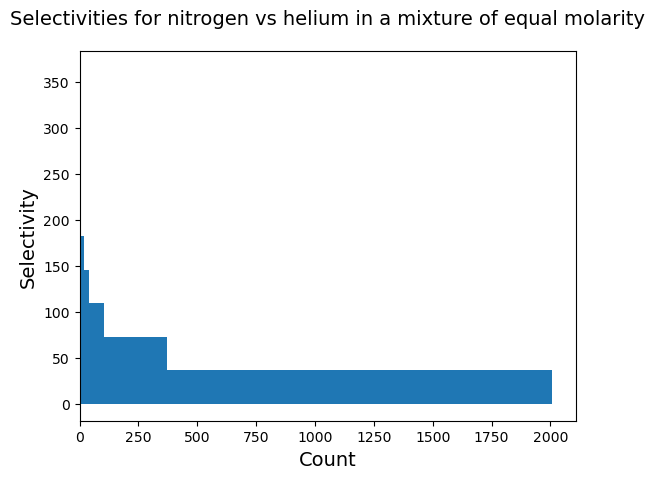

In [66]:
#For each selectivity class, plot: count vs selectivity.
N2_He_equal_plot = data["Selectivity N2/He (1:1:1)"].plot.hist(orientation="horizontal", cumulative=False)
N2_He_equal_plot.set_xlabel("Count", fontsize=14)
N2_He_equal_plot.set_ylabel("Selectivity",fontsize=14)
N2_He_equal_plot.set_title('Selectivities for nitrogen vs helium in a mixture of equal molarity', x=0.5, y=1.05, ha='center',fontsize=14)
tick_font_size=13

N2_He_equal_plot.figure.savefig('Histogram-N2-He-equal.png')

Text(0.5, 1.05, 'Selectivities for methane vs helium in a mixture of equal molarity')

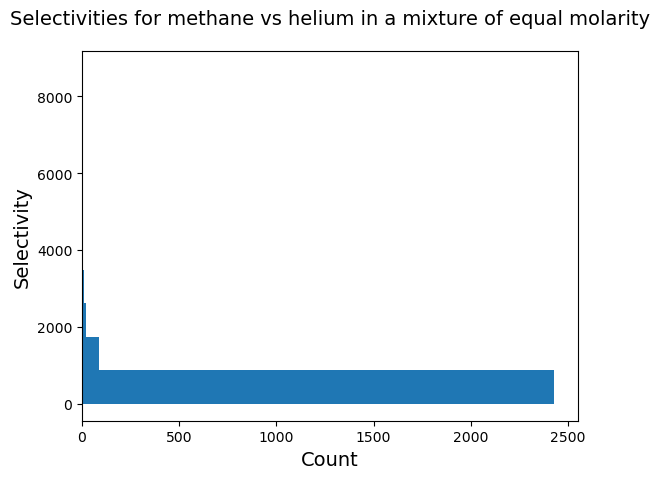

In [67]:
methane_He_equal_plot = data["Selectivity methane/He (1:1:1)"].plot.hist(orientation="horizontal", cumulative=False)
methane_He_equal_plot.set_xlabel("Count",fontsize=14)
methane_He_equal_plot.set_ylabel("Selectivity",fontsize=14)
tick_font_size=13

methane_He_equal_plot.set_title('Selectivities for methane vs helium in a mixture of equal molarity', x=0.5, y=1.05, ha='center',fontsize=14)

Text(0.5, 1.05, 'Selectivities for methane vs nitrogen in a mixture of equal molarity')

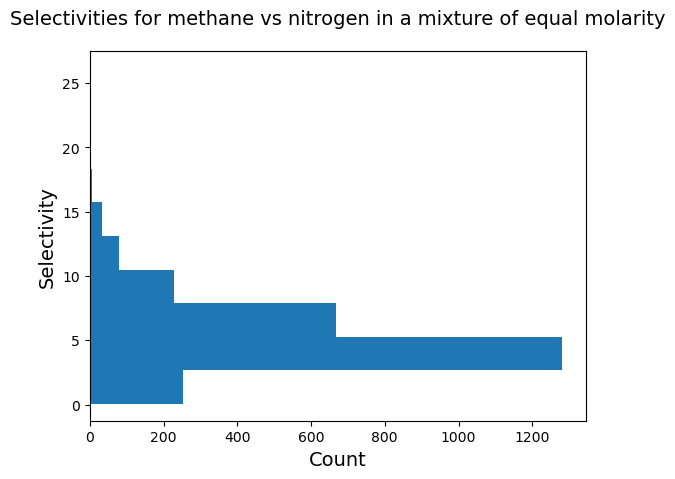

In [68]:
methane_N2_equal_plot = data["Selectivity methane/N2 (1:1:1)"].plot.hist(orientation="horizontal", cumulative=False)
methane_N2_equal_plot.set_xlabel("Count",fontsize=14)
methane_N2_equal_plot.set_ylabel("Selectivity",fontsize=14)
tick_font_size=13

methane_N2_equal_plot.set_title('Selectivities for methane vs nitrogen in a mixture of equal molarity', x=0.5, y=1.05, ha='center',fontsize=14)

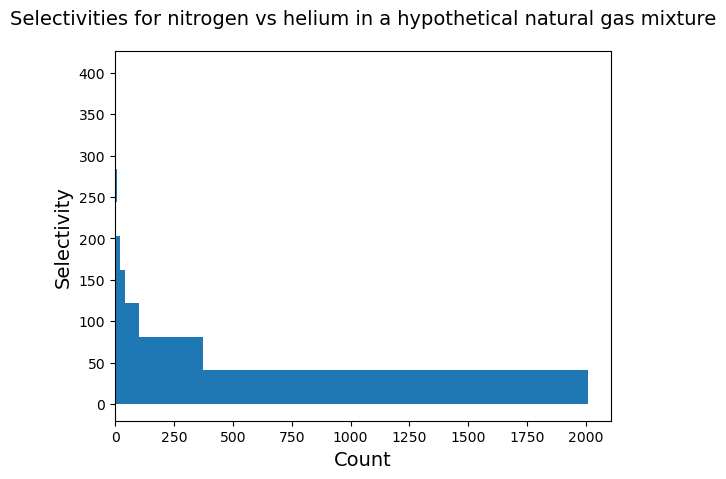

In [69]:
N2_He_natural_plot = data["Selectivity N2/He (0.95:0.05:0.045)"].plot.hist(orientation="horizontal", cumulative=False)
N2_He_natural_plot.set_xlabel("Count", fontsize = 14)
N2_He_natural_plot.set_ylabel("Selectivity", fontsize = 14)
N2_He_natural_plot.set_title('Selectivities for nitrogen vs helium in a hypothetical natural gas mixture', x=0.5, y=1.05, ha='center', fontsize=14)
#N2_He_natural_plot.figure.set_size_inches(7, 6)
tick_font_size=13

N2_He_natural_plot.figure.savefig('Histogram-N2-He-natural.png', bbox_inches ='tight')

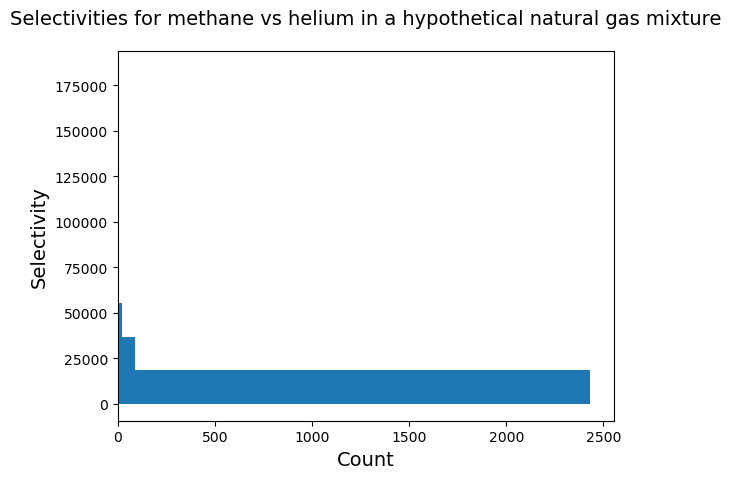

In [70]:
methane_He_natural_plot = data["Selectivity methane/He (0.95:0.05:0.045)"].plot.hist(orientation="horizontal", cumulative=False)
methane_He_natural_plot.set_xlabel("Count",fontsize=14)
methane_He_natural_plot.set_ylabel("Selectivity",fontsize=14)
methane_He_natural_plot.set_title('Selectivities for methane vs helium in a hypothetical natural gas mixture', x=0.5, y=1.05, ha='center',fontsize=14)
tick_font_size=13

methane_He_natural_plot.figure.savefig('Histogram-methane-He-natural.png')

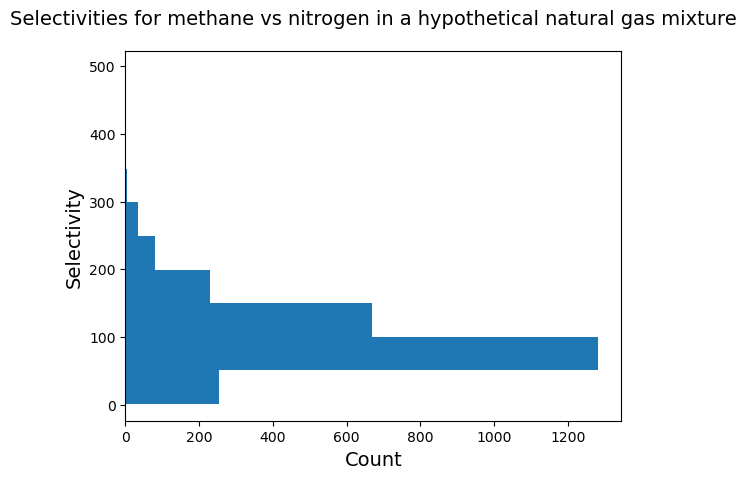

In [71]:
methane_N2_natural_plot = data["Selectivity methane/N2 (0.95:0.05:0.045)"].plot.hist(orientation="horizontal", cumulative=False)
methane_N2_natural_plot.set_xlabel("Count",fontsize=14)
methane_N2_natural_plot.set_ylabel("Selectivity",fontsize=14)
methane_N2_natural_plot.set_title('Selectivities for methane vs nitrogen in a hypothetical natural gas mixture', x=0.5, y=1.05, ha='center',fontsize=14)
tick_font_size=13

methane_N2_natural_plot.figure.savefig('Histogram-methane-N2-natural.png')

In [72]:
#Find the 10 MOFs having the highest selectivity for nitrogen vs helium in equal molarity mixture.
data.nlargest(10, "Selectivity N2/He (1:1:1)" )

,Name,N2 Henrys,N2 Henrys err,methane Henrys,methane Henrys err,helium Henrys,helium Henrys err,N2 adsorb,N2 adsorb err,methane adsorb,...,Selectivity methane/N2 (1:1:1),Selectivity N2/He (1:1:1) err,Selectivity methane/He (1:1:1) err,Selectivity methane/N2 (1:1:1) err,Selectivity N2/He (0.95:0.05:0.045),Selectivity methane/He (0.95:0.05:0.045),Selectivity methane/N2 (0.95:0.05:0.045),Selectivity N2/He (0.95:0.05:0.045) err,Selectivity methane/He (0.95:0.05:0.045) err,Selectivity methane/N2 (0.95:0.05:0.045) err
811,ihajin_P1,0.000016,5.434700e-07,0.000391,0.000013,4.474900e-08,5.785830e-10,-23.923177,NaN,-32.951751,...,23.942027,5.440486e-07,0.000013,0.000014,405.771948,184585.055904,454.898514,2.719954e-08,0.000012,0.000012
1205,bedhoj_P1,0.000052,4.023100e-07,0.000809,0.000006,1.583320e-07,3.478080e-10,-21.812253,NaN,-29.043816,...,15.693086,4.026578e-07,0.000006,0.000006,361.953925,107923.308828,298.168638,2.013115e-08,0.000006,0.000006
1079,kaxqor_P1,0.000018,2.150550e-07,0.000282,0.000007,6.319040e-08,6.438710e-10,-22.161574,NaN,-29.521092,...,15.661097,2.156989e-07,0.000007,0.000007,317.082271,94351.269250,297.560847,1.078172e-08,0.000006,0.000006
2072,qewdon_P1,0.000016,3.881650e-07,0.000270,0.000011,5.774610e-08,3.018180e-10,-22.236119,NaN,-29.958129,...,16.710211,3.884668e-07,0.000011,0.000011,311.378412,98860.779246,317.494006,1.942183e-08,0.000010,0.000010
109,laplog01_P1_charged,0.000027,3.223660e-07,0.000458,0.000008,1.067320e-07,8.314810e-10,-21.733866,NaN,-29.161794,...,17.025951,3.231975e-07,0.000008,0.000009,280.285617,90670.453930,323.493067,1.615572e-08,0.000008,0.000008
549,lezzex_P1,0.000017,1.937190e-07,0.000244,0.000004,7.255700e-08,6.388120e-10,-19.954126,NaN,-26.859852,...,14.240781,1.943578e-07,0.000004,0.000004,262.374562,70991.955750,270.574842,9.714697e-09,0.000003,0.000003
2385,wupvek_P1,0.000019,1.859300e-07,0.000291,0.000004,8.406580e-08,8.078440e-10,-21.127133,NaN,-28.310518,...,15.267995,1.867378e-07,0.000004,0.000005,252.240242,73172.853223,290.091908,9.332853e-09,0.000004,0.000004
1109,mejvac_P1,0.000011,2.537850e-07,0.000170,0.000008,4.688830e-08,5.738290e-10,-22.329024,NaN,-29.801641,...,16.070334,2.543588e-07,0.000008,0.000009,250.533952,76497.121883,305.336347,1.271507e-08,0.000008,0.000008
2052,qovxeg02_P1,0.000024,2.932620e-07,0.000357,0.000011,1.103170e-07,7.542260e-10,-21.263398,NaN,-28.270963,...,14.627375,2.940162e-07,0.000011,0.000011,245.606349,68258.946692,277.920123,1.469704e-08,0.000010,0.000010
1061,kaxkec_P1,0.000021,2.593220e-07,0.000292,0.000006,9.681340e-08,6.658300e-10,-22.069986,NaN,-28.832899,...,13.682680,2.599878e-07,0.000006,0.000006,244.770983,63633.340013,259.970929,1.299606e-08,0.000005,0.000005


In [73]:
#Find the 10 MOFs having the highest selectivity for methane vs helium in equal molarity mixture.
data.nlargest(10, "Selectivity methane/He (1:1:1)" )

,Name,N2 Henrys,N2 Henrys err,methane Henrys,methane Henrys err,helium Henrys,helium Henrys err,N2 adsorb,N2 adsorb err,methane adsorb,...,Selectivity methane/N2 (1:1:1),Selectivity N2/He (1:1:1) err,Selectivity methane/He (1:1:1) err,Selectivity methane/N2 (1:1:1) err,Selectivity N2/He (0.95:0.05:0.045),Selectivity methane/He (0.95:0.05:0.045),Selectivity methane/N2 (0.95:0.05:0.045),Selectivity N2/He (0.95:0.05:0.045) err,Selectivity methane/He (0.95:0.05:0.045) err,Selectivity methane/N2 (0.95:0.05:0.045) err
811,ihajin_P1,0.000016,5.434700e-07,0.000391,0.000013,4.474900e-08,5.785830e-10,-23.923177,NaN,-32.951751,...,23.942027,5.440486e-07,0.000013,0.000014,405.771948,184585.055904,454.898514,2.719954e-08,0.000012,0.000012
1205,bedhoj_P1,0.000052,4.023100e-07,0.000809,0.000006,1.583320e-07,3.478080e-10,-21.812253,NaN,-29.043816,...,15.693086,4.026578e-07,0.000006,0.000006,361.953925,107923.308828,298.168638,2.013115e-08,0.000006,0.000006
2072,qewdon_P1,0.000016,3.881650e-07,0.000270,0.000011,5.774610e-08,3.018180e-10,-22.236119,NaN,-29.958129,...,16.710211,3.884668e-07,0.000011,0.000011,311.378412,98860.779246,317.494006,1.942183e-08,0.000010,0.000010
1079,kaxqor_P1,0.000018,2.150550e-07,0.000282,0.000007,6.319040e-08,6.438710e-10,-22.161574,NaN,-29.521092,...,15.661097,2.156989e-07,0.000007,0.000007,317.082271,94351.269250,297.560847,1.078172e-08,0.000006,0.000006
109,laplog01_P1_charged,0.000027,3.223660e-07,0.000458,0.000008,1.067320e-07,8.314810e-10,-21.733866,NaN,-29.161794,...,17.025951,3.231975e-07,0.000008,0.000009,280.285617,90670.453930,323.493067,1.615572e-08,0.000008,0.000008
1109,mejvac_P1,0.000011,2.537850e-07,0.000170,0.000008,4.688830e-08,5.738290e-10,-22.329024,NaN,-29.801641,...,16.070334,2.543588e-07,0.000008,0.000009,250.533952,76497.121883,305.336347,1.271507e-08,0.000008,0.000008
2385,wupvek_P1,0.000019,1.859300e-07,0.000291,0.000004,8.406580e-08,8.078440e-10,-21.127133,NaN,-28.310518,...,15.267995,1.867378e-07,0.000004,0.000005,252.240242,73172.853223,290.091908,9.332853e-09,0.000004,0.000004
549,lezzex_P1,0.000017,1.937190e-07,0.000244,0.000004,7.255700e-08,6.388120e-10,-19.954126,NaN,-26.859852,...,14.240781,1.943578e-07,0.000004,0.000004,262.374562,70991.955750,270.574842,9.714697e-09,0.000003,0.000003
2052,qovxeg02_P1,0.000024,2.932620e-07,0.000357,0.000011,1.103170e-07,7.542260e-10,-21.263398,NaN,-28.270963,...,14.627375,2.940162e-07,0.000011,0.000011,245.606349,68258.946692,277.920123,1.469704e-08,0.000010,0.000010
1352,womcuy_P1,0.000016,2.568020e-07,0.000271,0.000011,8.842430e-08,6.415450e-10,-21.483930,NaN,-29.625555,...,16.894265,2.574435e-07,0.000011,0.000011,201.258151,64602.063259,320.991040,1.286897e-08,0.000010,0.000010


In [74]:
#Find the 10 MOFs having the highest selectivity for methane vs nitrogen in equal molarity mixture.
data.nlargest(10, "Selectivity methane/N2 (1:1:1)" )

,Name,N2 Henrys,N2 Henrys err,methane Henrys,methane Henrys err,helium Henrys,helium Henrys err,N2 adsorb,N2 adsorb err,methane adsorb,...,Selectivity methane/N2 (1:1:1),Selectivity N2/He (1:1:1) err,Selectivity methane/He (1:1:1) err,Selectivity methane/N2 (1:1:1) err,Selectivity N2/He (0.95:0.05:0.045),Selectivity methane/He (0.95:0.05:0.045),Selectivity methane/N2 (0.95:0.05:0.045),Selectivity N2/He (0.95:0.05:0.045) err,Selectivity methane/He (0.95:0.05:0.045) err,Selectivity methane/N2 (0.95:0.05:0.045) err
692,bufpau01_P1_charged_H,0.000009,2.362550e-07,0.000235,0.000017,2.453130e-07,4.171870e-10,-22.865113,NaN,-34.015385,...,26.183323,2.366722e-07,0.000017,0.000018,40.647844,20221.617100,497.483146,1.183152e-08,0.000017,0.000017
811,ihajin_P1,0.000016,5.434700e-07,0.000391,0.000013,4.474900e-08,5.785830e-10,-23.923177,NaN,-32.951751,...,23.942027,5.440486e-07,0.000013,0.000014,405.771948,184585.055904,454.898514,2.719954e-08,0.000012,0.000012
656,boxfie_P1_charged,0.000013,5.668950e-07,0.000293,0.000012,3.021180e-07,4.870170e-10,-22.431283,NaN,-33.363305,...,23.283973,5.673820e-07,0.000012,0.000012,46.219615,20447.349123,442.395484,2.836667e-08,0.000011,0.000011
679,bufnog_P1_charged_H,0.000009,1.546720e-07,0.000186,0.000013,2.585560e-07,4.373510e-10,-21.433421,NaN,-31.773352,...,20.809098,1.551094e-07,0.000013,0.000013,38.478318,15213.282831,395.372865,7.753281e-09,0.000012,0.000012
1767,tubday_P1_H,0.000002,1.514990e-07,0.000045,0.000014,3.271910e-07,8.037430e-10,-15.421996,NaN,-34.149250,...,20.448324,1.523027e-07,0.000014,0.000014,7.445906,2892.869574,388.518159,7.611118e-09,0.000013,0.000013
611,dejrob_P1,0.000010,1.666340e-07,0.000197,0.000010,1.358730e-07,4.325570e-10,-20.322673,NaN,-31.840877,...,19.592606,1.670666e-07,0.000010,0.000010,82.017767,30531.893754,372.259512,8.351165e-09,0.000009,0.000009
693,boxfok_P1_charged_H,0.000008,2.918860e-07,0.000138,0.000013,3.011000e-07,4.894940e-10,-19.678224,NaN,-30.126622,...,17.045964,2.923755e-07,0.000013,0.000013,29.780361,9645.064394,323.873321,1.461633e-08,0.000012,0.000012
109,laplog01_P1_charged,0.000027,3.223660e-07,0.000458,0.000008,1.067320e-07,8.314810e-10,-21.733866,NaN,-29.161794,...,17.025951,3.231975e-07,0.000008,0.000009,280.285617,90670.453930,323.493067,1.615572e-08,0.000008,0.000008
1352,womcuy_P1,0.000016,2.568020e-07,0.000271,0.000011,8.842430e-08,6.415450e-10,-21.483930,NaN,-29.625555,...,16.894265,2.574435e-07,0.000011,0.000011,201.258151,64602.063259,320.991040,1.286897e-08,0.000010,0.000010
2072,qewdon_P1,0.000016,3.881650e-07,0.000270,0.000011,5.774610e-08,3.018180e-10,-22.236119,NaN,-29.958129,...,16.710211,3.884668e-07,0.000011,0.000011,311.378412,98860.779246,317.494006,1.942183e-08,0.000010,0.000010


In [75]:
#Find the 10 MOFs having the highest selectivity for nitrogen vs helium in hypothetical natural gas mixture.
data.nlargest(10, "Selectivity N2/He (0.95:0.05:0.045)")

,Name,N2 Henrys,N2 Henrys err,methane Henrys,methane Henrys err,helium Henrys,helium Henrys err,N2 adsorb,N2 adsorb err,methane adsorb,...,Selectivity methane/N2 (1:1:1),Selectivity N2/He (1:1:1) err,Selectivity methane/He (1:1:1) err,Selectivity methane/N2 (1:1:1) err,Selectivity N2/He (0.95:0.05:0.045),Selectivity methane/He (0.95:0.05:0.045),Selectivity methane/N2 (0.95:0.05:0.045),Selectivity N2/He (0.95:0.05:0.045) err,Selectivity methane/He (0.95:0.05:0.045) err,Selectivity methane/N2 (0.95:0.05:0.045) err
811,ihajin_P1,0.000016,5.434700e-07,0.000391,0.000013,4.474900e-08,5.785830e-10,-23.923177,NaN,-32.951751,...,23.942027,5.440486e-07,0.000013,0.000014,405.771948,184585.055904,454.898514,2.719954e-08,0.000012,0.000012
1205,bedhoj_P1,0.000052,4.023100e-07,0.000809,0.000006,1.583320e-07,3.478080e-10,-21.812253,NaN,-29.043816,...,15.693086,4.026578e-07,0.000006,0.000006,361.953925,107923.308828,298.168638,2.013115e-08,0.000006,0.000006
1079,kaxqor_P1,0.000018,2.150550e-07,0.000282,0.000007,6.319040e-08,6.438710e-10,-22.161574,NaN,-29.521092,...,15.661097,2.156989e-07,0.000007,0.000007,317.082271,94351.269250,297.560847,1.078172e-08,0.000006,0.000006
2072,qewdon_P1,0.000016,3.881650e-07,0.000270,0.000011,5.774610e-08,3.018180e-10,-22.236119,NaN,-29.958129,...,16.710211,3.884668e-07,0.000011,0.000011,311.378412,98860.779246,317.494006,1.942183e-08,0.000010,0.000010
109,laplog01_P1_charged,0.000027,3.223660e-07,0.000458,0.000008,1.067320e-07,8.314810e-10,-21.733866,NaN,-29.161794,...,17.025951,3.231975e-07,0.000008,0.000009,280.285617,90670.453930,323.493067,1.615572e-08,0.000008,0.000008
549,lezzex_P1,0.000017,1.937190e-07,0.000244,0.000004,7.255700e-08,6.388120e-10,-19.954126,NaN,-26.859852,...,14.240781,1.943578e-07,0.000004,0.000004,262.374562,70991.955750,270.574842,9.714697e-09,0.000003,0.000003
2385,wupvek_P1,0.000019,1.859300e-07,0.000291,0.000004,8.406580e-08,8.078440e-10,-21.127133,NaN,-28.310518,...,15.267995,1.867378e-07,0.000004,0.000005,252.240242,73172.853223,290.091908,9.332853e-09,0.000004,0.000004
1109,mejvac_P1,0.000011,2.537850e-07,0.000170,0.000008,4.688830e-08,5.738290e-10,-22.329024,NaN,-29.801641,...,16.070334,2.543588e-07,0.000008,0.000009,250.533952,76497.121883,305.336347,1.271507e-08,0.000008,0.000008
2052,qovxeg02_P1,0.000024,2.932620e-07,0.000357,0.000011,1.103170e-07,7.542260e-10,-21.263398,NaN,-28.270963,...,14.627375,2.940162e-07,0.000011,0.000011,245.606349,68258.946692,277.920123,1.469704e-08,0.000010,0.000010
1061,kaxkec_P1,0.000021,2.593220e-07,0.000292,0.000006,9.681340e-08,6.658300e-10,-22.069986,NaN,-28.832899,...,13.682680,2.599878e-07,0.000006,0.000006,244.770983,63633.340013,259.970929,1.299606e-08,0.000005,0.000005


In [76]:
#Find the 10 MOFs having the highest selectivity for methane vs helium in hypothetical natural gas mixture.
data.nlargest(10, "Selectivity methane/He (0.95:0.05:0.045)")

,Name,N2 Henrys,N2 Henrys err,methane Henrys,methane Henrys err,helium Henrys,helium Henrys err,N2 adsorb,N2 adsorb err,methane adsorb,...,Selectivity methane/N2 (1:1:1),Selectivity N2/He (1:1:1) err,Selectivity methane/He (1:1:1) err,Selectivity methane/N2 (1:1:1) err,Selectivity N2/He (0.95:0.05:0.045),Selectivity methane/He (0.95:0.05:0.045),Selectivity methane/N2 (0.95:0.05:0.045),Selectivity N2/He (0.95:0.05:0.045) err,Selectivity methane/He (0.95:0.05:0.045) err,Selectivity methane/N2 (0.95:0.05:0.045) err
811,ihajin_P1,0.000016,5.434700e-07,0.000391,0.000013,4.474900e-08,5.785830e-10,-23.923177,NaN,-32.951751,...,23.942027,5.440486e-07,0.000013,0.000014,405.771948,184585.055904,454.898514,2.719954e-08,0.000012,0.000012
1205,bedhoj_P1,0.000052,4.023100e-07,0.000809,0.000006,1.583320e-07,3.478080e-10,-21.812253,NaN,-29.043816,...,15.693086,4.026578e-07,0.000006,0.000006,361.953925,107923.308828,298.168638,2.013115e-08,0.000006,0.000006
2072,qewdon_P1,0.000016,3.881650e-07,0.000270,0.000011,5.774610e-08,3.018180e-10,-22.236119,NaN,-29.958129,...,16.710211,3.884668e-07,0.000011,0.000011,311.378412,98860.779246,317.494006,1.942183e-08,0.000010,0.000010
1079,kaxqor_P1,0.000018,2.150550e-07,0.000282,0.000007,6.319040e-08,6.438710e-10,-22.161574,NaN,-29.521092,...,15.661097,2.156989e-07,0.000007,0.000007,317.082271,94351.269250,297.560847,1.078172e-08,0.000006,0.000006
109,laplog01_P1_charged,0.000027,3.223660e-07,0.000458,0.000008,1.067320e-07,8.314810e-10,-21.733866,NaN,-29.161794,...,17.025951,3.231975e-07,0.000008,0.000009,280.285617,90670.453930,323.493067,1.615572e-08,0.000008,0.000008
1109,mejvac_P1,0.000011,2.537850e-07,0.000170,0.000008,4.688830e-08,5.738290e-10,-22.329024,NaN,-29.801641,...,16.070334,2.543588e-07,0.000008,0.000009,250.533952,76497.121883,305.336347,1.271507e-08,0.000008,0.000008
2385,wupvek_P1,0.000019,1.859300e-07,0.000291,0.000004,8.406580e-08,8.078440e-10,-21.127133,NaN,-28.310518,...,15.267995,1.867378e-07,0.000004,0.000005,252.240242,73172.853223,290.091908,9.332853e-09,0.000004,0.000004
549,lezzex_P1,0.000017,1.937190e-07,0.000244,0.000004,7.255700e-08,6.388120e-10,-19.954126,NaN,-26.859852,...,14.240781,1.943578e-07,0.000004,0.000004,262.374562,70991.955750,270.574842,9.714697e-09,0.000003,0.000003
2052,qovxeg02_P1,0.000024,2.932620e-07,0.000357,0.000011,1.103170e-07,7.542260e-10,-21.263398,NaN,-28.270963,...,14.627375,2.940162e-07,0.000011,0.000011,245.606349,68258.946692,277.920123,1.469704e-08,0.000010,0.000010
1352,womcuy_P1,0.000016,2.568020e-07,0.000271,0.000011,8.842430e-08,6.415450e-10,-21.483930,NaN,-29.625555,...,16.894265,2.574435e-07,0.000011,0.000011,201.258151,64602.063259,320.991040,1.286897e-08,0.000010,0.000010


In [77]:
#Find the 10 MOFs having the highest selectivity for methane/nitrogen in hypothetical natural gas mixture.
data.nlargest(10, "Selectivity methane/N2 (0.95:0.05:0.045)")

,Name,N2 Henrys,N2 Henrys err,methane Henrys,methane Henrys err,helium Henrys,helium Henrys err,N2 adsorb,N2 adsorb err,methane adsorb,...,Selectivity methane/N2 (1:1:1),Selectivity N2/He (1:1:1) err,Selectivity methane/He (1:1:1) err,Selectivity methane/N2 (1:1:1) err,Selectivity N2/He (0.95:0.05:0.045),Selectivity methane/He (0.95:0.05:0.045),Selectivity methane/N2 (0.95:0.05:0.045),Selectivity N2/He (0.95:0.05:0.045) err,Selectivity methane/He (0.95:0.05:0.045) err,Selectivity methane/N2 (0.95:0.05:0.045) err
692,bufpau01_P1_charged_H,0.000009,2.362550e-07,0.000235,0.000017,2.453130e-07,4.171870e-10,-22.865113,NaN,-34.015385,...,26.183323,2.366722e-07,0.000017,0.000018,40.647844,20221.617100,497.483146,1.183152e-08,0.000017,0.000017
811,ihajin_P1,0.000016,5.434700e-07,0.000391,0.000013,4.474900e-08,5.785830e-10,-23.923177,NaN,-32.951751,...,23.942027,5.440486e-07,0.000013,0.000014,405.771948,184585.055904,454.898514,2.719954e-08,0.000012,0.000012
656,boxfie_P1_charged,0.000013,5.668950e-07,0.000293,0.000012,3.021180e-07,4.870170e-10,-22.431283,NaN,-33.363305,...,23.283973,5.673820e-07,0.000012,0.000012,46.219615,20447.349123,442.395484,2.836667e-08,0.000011,0.000011
679,bufnog_P1_charged_H,0.000009,1.546720e-07,0.000186,0.000013,2.585560e-07,4.373510e-10,-21.433421,NaN,-31.773352,...,20.809098,1.551094e-07,0.000013,0.000013,38.478318,15213.282831,395.372865,7.753281e-09,0.000012,0.000012
1767,tubday_P1_H,0.000002,1.514990e-07,0.000045,0.000014,3.271910e-07,8.037430e-10,-15.421996,NaN,-34.149250,...,20.448324,1.523027e-07,0.000014,0.000014,7.445906,2892.869574,388.518159,7.611118e-09,0.000013,0.000013
611,dejrob_P1,0.000010,1.666340e-07,0.000197,0.000010,1.358730e-07,4.325570e-10,-20.322673,NaN,-31.840877,...,19.592606,1.670666e-07,0.000010,0.000010,82.017767,30531.893754,372.259512,8.351165e-09,0.000009,0.000009
693,boxfok_P1_charged_H,0.000008,2.918860e-07,0.000138,0.000013,3.011000e-07,4.894940e-10,-19.678224,NaN,-30.126622,...,17.045964,2.923755e-07,0.000013,0.000013,29.780361,9645.064394,323.873321,1.461633e-08,0.000012,0.000012
109,laplog01_P1_charged,0.000027,3.223660e-07,0.000458,0.000008,1.067320e-07,8.314810e-10,-21.733866,NaN,-29.161794,...,17.025951,3.231975e-07,0.000008,0.000009,280.285617,90670.453930,323.493067,1.615572e-08,0.000008,0.000008
1352,womcuy_P1,0.000016,2.568020e-07,0.000271,0.000011,8.842430e-08,6.415450e-10,-21.483930,NaN,-29.625555,...,16.894265,2.574435e-07,0.000011,0.000011,201.258151,64602.063259,320.991040,1.286897e-08,0.000010,0.000010
2072,qewdon_P1,0.000016,3.881650e-07,0.000270,0.000011,5.774610e-08,3.018180e-10,-22.236119,NaN,-29.958129,...,16.710211,3.884668e-07,0.000011,0.000011,311.378412,98860.779246,317.494006,1.942183e-08,0.000010,0.000010


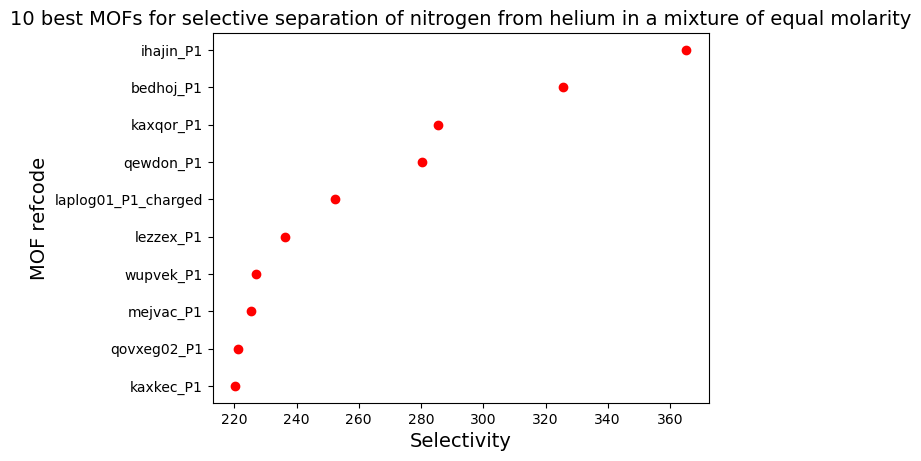

In [78]:
#For each of the selectivity classes, plot those 10 best MOfs vs their selectivity.
x = data.nlargest(10, "Selectivity N2/He (1:1:1)")["Selectivity N2/He (1:1:1)"]
y = data.nlargest(10, "Selectivity N2/He (1:1:1)")["Name"]
plt.scatter(x, y, c = "red")
plt.xlabel("Selectivity",fontsize=14)
plt.ylabel("MOF refcode",fontsize=14)
plt.title("10 best MOFs for selective separation of nitrogen from helium in a mixture of equal molarity",fontsize=14)

plt.gca().invert_yaxis()
tick_font_size=13

plt.show()

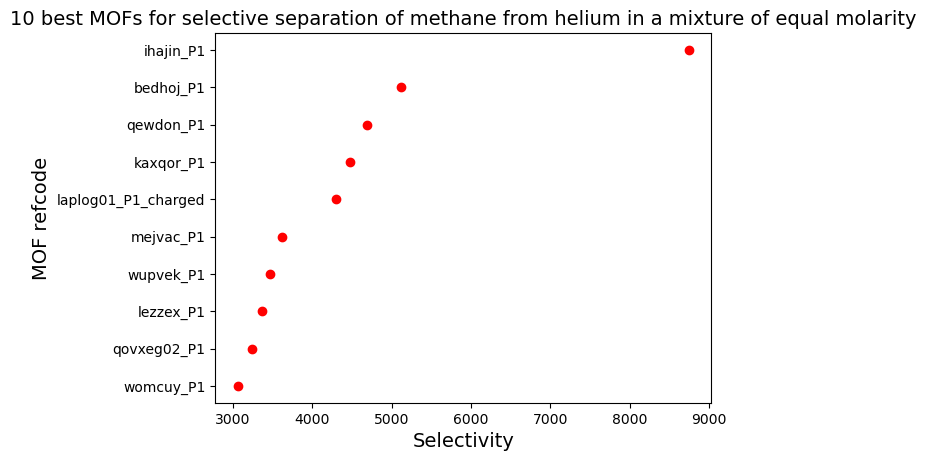

In [79]:
x = data.nlargest(10, "Selectivity methane/He (1:1:1)")["Selectivity methane/He (1:1:1)"]
y = data.nlargest(10, "Selectivity methane/He (1:1:1)")["Name"]
plt.scatter(x, y, c = "red")
plt.xlabel("Selectivity",fontsize=14)
plt.ylabel("MOF refcode",fontsize=14)
plt.title("10 best MOFs for selective separation of methane from helium in a mixture of equal molarity",fontsize=14)

plt.gca().invert_yaxis()
tick_font_size=13

plt.show()

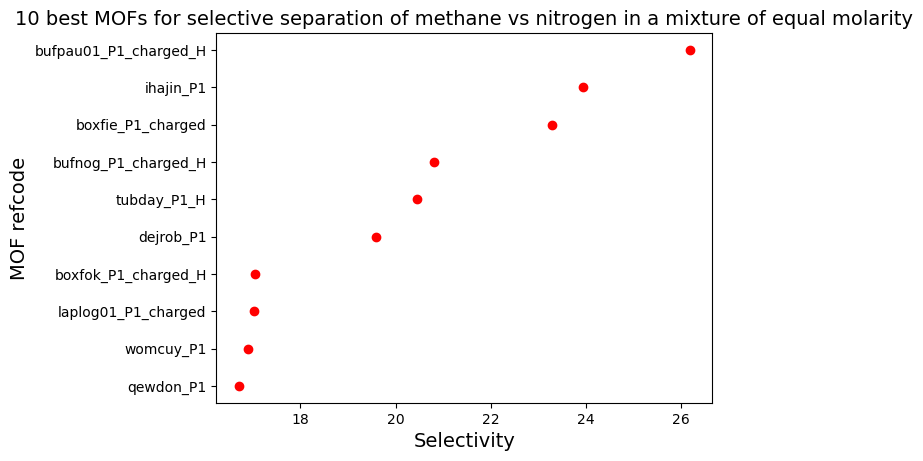

In [80]:
x = data.nlargest(10, "Selectivity methane/N2 (1:1:1)")["Selectivity methane/N2 (1:1:1)"]
y = data.nlargest(10, "Selectivity methane/N2 (1:1:1)")["Name"]
plt.scatter(x, y, c = "red")
plt.xlabel("Selectivity",fontsize=14)
plt.ylabel("MOF refcode",fontsize=14)
plt.title("10 best MOFs for selective separation of methane vs nitrogen in a mixture of equal molarity",fontsize=14)

plt.gca().invert_yaxis()
tick_font_size=13

plt.show()

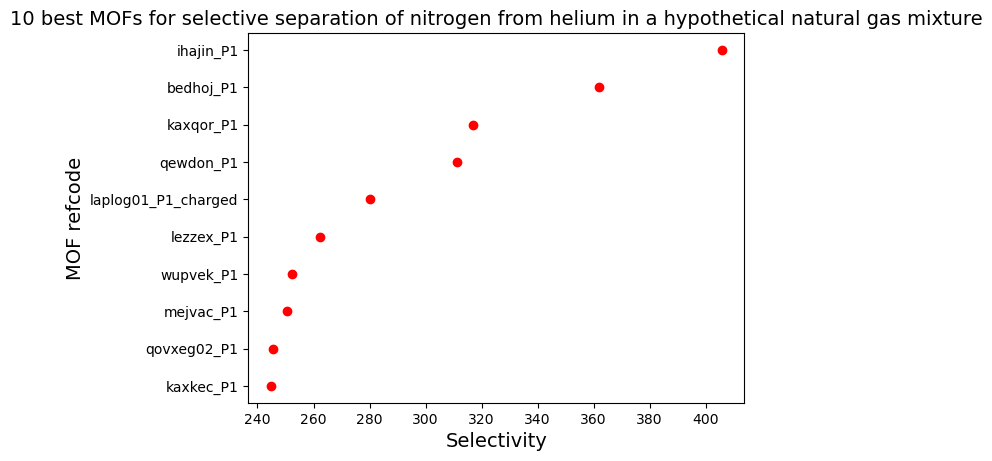

In [81]:
x = data.nlargest(10, "Selectivity N2/He (0.95:0.05:0.045)")["Selectivity N2/He (0.95:0.05:0.045)"]
y = data.nlargest(10, "Selectivity N2/He (0.95:0.05:0.045)")["Name"]
plt.scatter(x, y, c = "red")
plt.xlabel("Selectivity",fontsize=14)
plt.ylabel("MOF refcode",fontsize=14)
plt.title("10 best MOFs for selective separation of nitrogen from helium in a hypothetical natural gas mixture",fontsize=14)

plt.gca().invert_yaxis()
tick_font_size=13

plt.savefig("Best-N2-He-natural.png", bbox_inches ='tight')
plt.show()

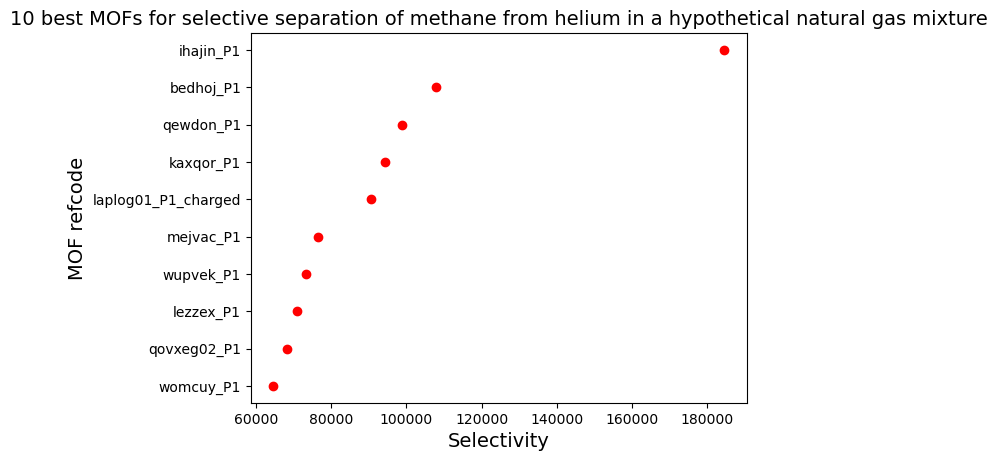

In [82]:
x = data.nlargest(10, "Selectivity methane/He (0.95:0.05:0.045)")["Selectivity methane/He (0.95:0.05:0.045)"]
y = data.nlargest(10, "Selectivity methane/He (0.95:0.05:0.045)")["Name"]
plt.scatter(x, y, c = "red")
plt.xlabel("Selectivity",fontsize=14)
plt.ylabel("MOF refcode",fontsize=14)
plt.title("10 best MOFs for selective separation of methane from helium in a hypothetical natural gas mixture",fontsize=14)

plt.gca().invert_yaxis()
tick_font_size=13


plt.savefig("Best-methane-He-natural.png", bbox_inches ='tight')
plt.show()

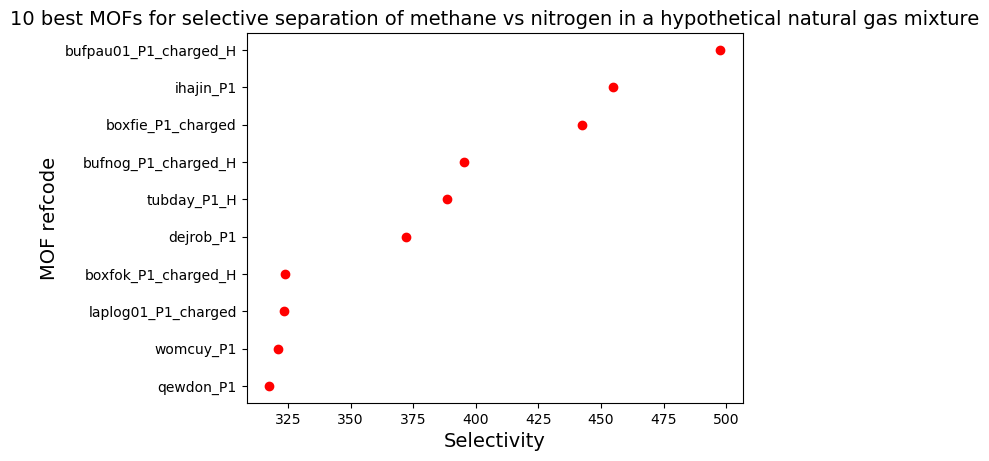

In [83]:
x = data.nlargest(10, "Selectivity methane/N2 (0.95:0.05:0.045)")["Selectivity methane/N2 (0.95:0.05:0.045)"]
y = data.nlargest(10, "Selectivity methane/N2 (0.95:0.05:0.045)")["Name"]
plt.scatter(x, y, c = "red")
plt.xlabel("Selectivity",fontsize=14)
plt.ylabel("MOF refcode",fontsize=14)
plt.title("10 best MOFs for selective separation of methane vs nitrogen in a hypothetical natural gas mixture",fontsize=14)

plt.gca().invert_yaxis()
tick_font_size=13

plt.savefig("Best-methane-N2-natural.png", bbox_inches ='tight')
plt.show()